In [1]:
import pandas as pd

techniques = {"BERT":"BERT ptBR",
              "BERT_FINE": "BERT Jud",
              "RoBERTa":"RoBERTa ptBR",
              "RoBERTa_FINE": "RoBERTa Jud",
              "GPT2":"GPT-2 ptBR",
              "GPT2_FINE": "GPT-2 Jud"}

type = 'RoBERTa'
path = 'data/' + type+ '/'
df_result_group = pd.read_csv(path + 'consolidated_group.zip')

In [2]:
df_result_group.head()

,group_id,mean,base_level,parent_group_id
0,1000,0.985636,0,0
1,1001,0.987768,0,0
2,1002,0.978818,0,0
3,1003,0.983870,0,0
4,1004,0.952733,0,0


In [3]:
#df_result = pd.read_pickle(path + 'consolidated_data.pkl', compression='zip')
df_result = None
for i in range(10):
    if i == 0:
        df_result = pd.read_pickle(path + 'consolidated_data' + str(i) + '.pkl', compression='zip')
    else:
        df_result = pd.concat([df_result, pd.read_pickle(path + 'consolidated_data' + str(i) + '.pkl', compression='zip')])

In [4]:
df_result.head()

,group_id,dist_cntr,process_document_id,document_embbeding
0,1000,0.894663,9835307,"[0.21529156, -0.12974843, 0.055746652, 0.21676..."
1,1000,0.937139,4115308,"[0.27565858, -0.10371565, 0.074569866, 0.24859..."
2,1000,0.938523,14273970,"[0.30679777, -0.03347013, 0.100540146, 0.27287..."
3,1000,0.940997,13245053,"[0.29917675, -0.07756665, 0.10655929, 0.177948..."
4,1000,0.941331,13369804,"[0.20382865, -0.028910032, 0.12947078, 0.22817..."


In [5]:
df_agg = df_result[['group_id', 'dist_cntr']].groupby('group_id').agg(count=('dist_cntr', 'count'), mean=('dist_cntr', 'mean')) 

In [6]:
df_agg.describe()

,count,mean
count,34.000000,34.000000
mean,6153.352941,0.986654
std,5441.699739,0.016784
min,227.000000,0.905441
25%,1410.500000,0.985168
50%,5905.000000,0.992506
75%,8848.000000,0.994157
max,21453.000000,0.996672


In [7]:
df = df_result_group[df_result_group.base_level==0]
df = df[['group_id', 'mean']].drop_duplicates()
df.describe()

,group_id,mean
count,34.000000,34.000000
mean,1016.500000,0.976123
std,9.958246,0.023160
min,1000.000000,0.874245
25%,1008.250000,0.971082
50%,1016.500000,0.985085
75%,1024.750000,0.988404
max,1033.000000,0.993395


In [8]:
df_0 = df_result_group[(df_result_group.base_level==0) & (~df_result_group.group_id.isin(df_result_group[df_result_group.base_level==1]['parent_group_id'].unique()))]
df_1 = df_result_group[df_result_group.base_level==1]

df = pd.concat([df_0, df_1])
df = df[['group_id', 'mean']].drop_duplicates()
df.describe()

,group_id,mean
count,34.000000,34.000000
mean,1016.500000,0.976123
std,9.958246,0.023160
min,1000.000000,0.874245
25%,1008.250000,0.971082
50%,1016.500000,0.985085
75%,1024.750000,0.988404
max,1033.000000,0.993395


In [9]:
df_0 = df_result_group[(df_result_group.base_level==0) & (~df_result_group.group_id.isin(df_result_group[df_result_group.base_level==1]['parent_group_id'].unique()))]
df_1 = df_result_group[(df_result_group.base_level==1) & (~df_result_group.group_id.isin(df_result_group[df_result_group.base_level==2]['parent_group_id'].unique()))]
df_2 = df_result_group[df_result_group.base_level==2]

df = pd.concat([df_0, df_1, df_2])
df = df[['group_id', 'mean']].drop_duplicates()
df.describe()

,group_id,mean
count,34.000000,34.000000
mean,1016.500000,0.976123
std,9.958246,0.023160
min,1000.000000,0.874245
25%,1008.250000,0.971082
50%,1016.500000,0.985085
75%,1024.750000,0.988404
max,1033.000000,0.993395


In [10]:
import numpy as np
loaded = np.load(path + 'inercias.npz', allow_pickle=True)
inertia_values = loaded["inertia_values"]
n_clusters = loaded["n_clusters"]

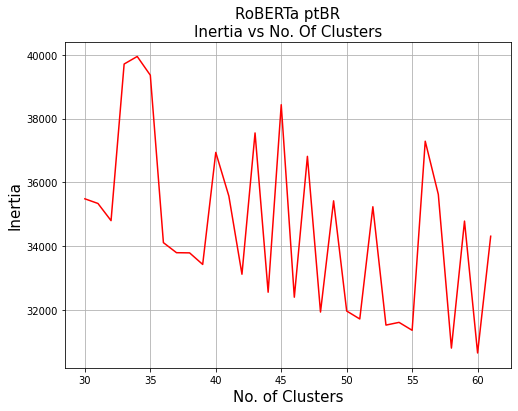

72.0


In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(n_clusters, inertia_values, color='red')
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('Inertia', fontsize=15)
plt.title(techniques[type] + '\nInertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()
print(fig.dpi)
fig.savefig('Inertia' + type + '.png', dpi=300)

In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,init='random', n_jobs=40,
    random_state=177).fit(np.asarray(df_result['document_embbeding'].to_list()))

/home.nfs/raphael.oliveira/anaconda3/envs/note/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [13]:
df=pd.DataFrame(tsne.embedding_)
df['labels'] = df_result['group_id'] 
df['dist_cntr'] = df_result['dist_cntr'] 

In [14]:
df['dist_cntr'] = df_result['dist_cntr'] 

In [15]:
df.head()

,0,1,labels,dist_cntr
0,4.594889,-35.890747,1000,0.894663
1,14.502000,-17.076862,1000,0.937139
2,7.904651,10.985768,1000,0.938523
3,14.145595,-3.530936,1000,0.940997
4,7.765013,-19.359512,1000,0.941331


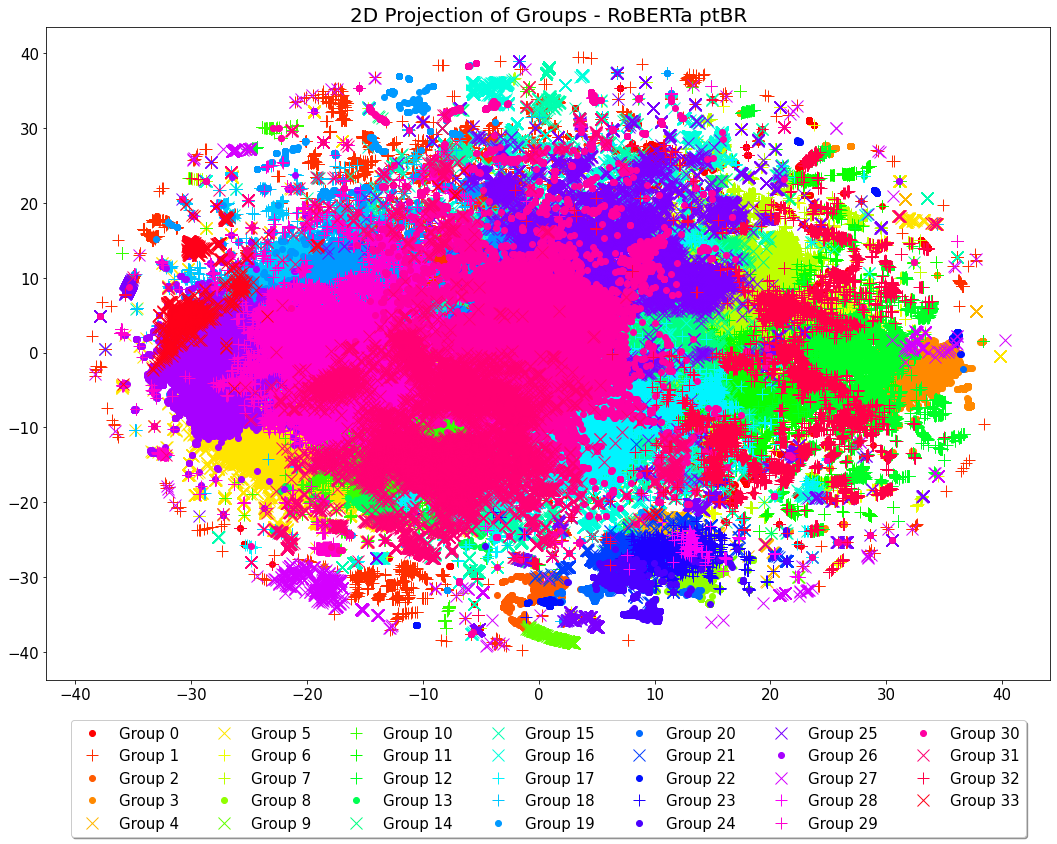

72.0


In [16]:
import matplotlib.pyplot as plt
import matplotlib
import random
from random import randrange
#markers = ['s','p','8','h', 'X','d']
markers = ['+', 'x', '.']


fig, ax = plt.subplots(figsize=(18,12))


def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

cmap = get_cmap(len(df_result['group_id'].unique()))

plts = []
for i, g in enumerate(df_result['group_id'].unique()):
    #print(i, g, cmap(i))
    df_plot = df[df['labels']==g]
    #df_plot = df_plot[df_plot['dist_cntr'] > 0.9].sample(80)    
    p = plt.plot(df_plot[0],df_plot[1], markers[randrange(len(markers))], markersize=12, c=cmap(i), label = 'Group ' + str(i))
    #plts.append(p)
    
#plt.legend(handles=plts, title='title', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=7,  fontsize=15)

ax.set_title('2D Projection of Groups - ' + techniques[type], fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

plt.show()
print(fig.dpi)
fig.savefig('2DProjection' + type + '.png', dpi=600, bbox_inches="tight")